In [74]:
import os
import random
import json
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from dotenv import load_dotenv
from tqdm import tqdm

In [75]:
load_dotenv()

True

In [76]:
metadata_filename = "meta_data_with_label.json"
data_path = os.getenv("ADNI_RDM_PATH")
metadata_file = open(os.path.join(data_path, metadata_filename))
metadata = json.load(metadata_file)

In [77]:
# Select a healthy brain
healthy_data = random.choice(list(metadata.values()))
while healthy_data["label"] != 0:
    healthy_data = random.choice(list(metadata.values()))

# And select an unhealthy brain
unhealthy_data = random.choice(list(metadata.values()))
while unhealthy_data["label"] != 2:
    unhealthy_data = random.choice(list(metadata.values()))


healthy_path = healthy_data['masked']
unhealthy_path = unhealthy_data['masked']

In [78]:
nifti_img = nib.load(os.path.join(data_path, unhealthy_path))

In [79]:
nii_data = nifti_img.get_fdata()
nii_aff  = nifti_img.affine
nii_hdr  = nifti_img.header
print(nii_data.shape)

(176, 240, 256)


In [80]:
rotated = np.rot90(nii_data, 1, (1, 2))
rotated.shape

(176, 256, 240)

In [81]:
# Get the middle slices
# Use the 3rd axis
midpoint = rotated.shape[0] // 2
sliced = rotated[midpoint - 10 : midpoint + 10, :, :]

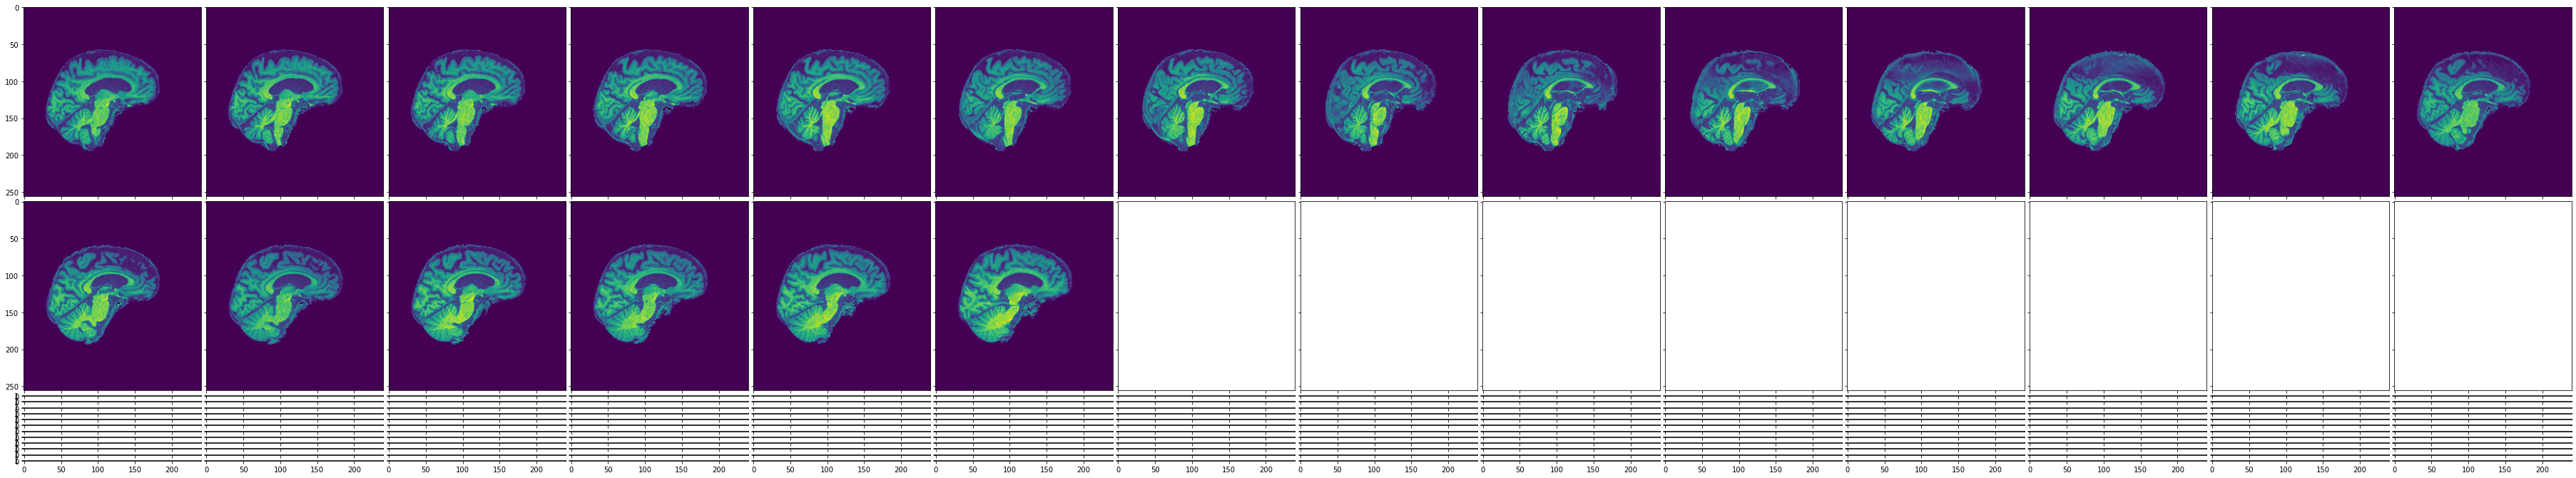

In [82]:

fig = plt.figure(figsize=(64., 64.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(14, 14),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, sliced):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()